In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline
import seaborn as sns

In [2]:
train_B = pd.read_csv('C:/Users/Jitesh Chandani/Desktop/Train.txt',sep=',')
test_B = pd.read_csv('C:/Users/Jitesh Chandani/Desktop/Test.txt',sep=',')

In [3]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [4]:
train_B.columns=columns
test_B.columns=columns

In [5]:
train_B.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
test_B.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [7]:
train_B.shape

(125972, 43)

In [8]:
test_B.shape

(22543, 43)

In [9]:
#Checking data types of varaibles,missing value presence and number of each data type
train_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [12]:
#Calculating general statistics for the train data to get insights about the data
train_B.describe(percentiles=[0.01,0.05,0.1,0.2,0.25,0.5,0.75,0.9,0.95,0.99]).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125972.0,0.0,3.617247e+07,287.146929,0.00,2.604526e+03,6.783553e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.58,4.290800e+04
src_bytes,125972.0,0.0,5.740179e+09,45567.100824,44.00,5.870354e+06,3.446106e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125972.0,0.0,2.491634e+09,19779.271433,0.00,4.021285e+06,1.617073e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.90,8314.00,25519.00,1.309937e+09
land,125972.0,0.0,2.500000e+01,0.000198,0.00,1.408613e-02,1.984190e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.0,2.858000e+03,0.022688,0.00,2.535310e-01,6.427796e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.0,1.400000e+01,0.000111,0.00,1.436608e-02,2.063844e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.0,2.575000e+04,0.204411,0.00,2.149977e+00,4.622401e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125972.0,0.0,1.540000e+02,0.001222,0.00,4.523932e-02,2.046596e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.0,4.985200e+04,0.395739,0.00,4.890107e-01,2.391315e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125972.0,0.0,3.517800e+04,0.279253,0.00,2.394214e+01,5.732259e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


In [12]:
#Checking Information
test_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [242]:
#Checking general stats of train data variables whose data type is object

train_B.describe(include='object').T.head()

,count,unique,top,freq
protocol_type,125972,3,tcp,102688
service,125972,70,http,40338
flag,125972,11,SF,74944
attack,125972,23,normal,67342


In [14]:
#Checking general stats of test data variables whose data type is object

test_B.describe(include='object').T.head()

,count,unique,top,freq
protocol_type,22543,3,tcp,18879
service,22543,64,http,7853
flag,22543,11,SF,14875
attack,22543,38,normal,9711


In [16]:
#This variable is unwanted 
print(train_B['num_outbound_cmds'].value_counts())
print(test_B['num_outbound_cmds'].value_counts())

0    125972
Name: num_outbound_cmds, dtype: int64
0    22543
Name: num_outbound_cmds, dtype: int64


In [17]:
#so removing it from both train and test data
train_B.drop(['num_outbound_cmds'], axis=1, inplace=True)
test_B.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [18]:
# Attack Class Distribution
train_B['attack'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

# 1.Binomial Classification: Activity is normal or attack

In [19]:
#This is a list of which incorporates all types of attacks.
attack_class=['neptune','satan','ipsweep','portsweep','smurf','nmap','back','teardrop','warezclient','pod','guess_passwd',
             'buffer_overflow','warezmaster','land','imap','rootkit','loadmodule','ftp_write','multihop','phf','perl',
             'spy','mscan','apache2','processtable','snmpguess','saint','mailbomb','snmpgetattack ','httptunnel','named',
             'ps','sendmail','xterm','land','xsnoop','worm','sqlattack','udpstorm ']

In [21]:
#Creating our dependent variable for binomial classification for train data by assigning normal as 0 and any attack as 1
train_B['attack']=train_B['attack'].apply(lambda x:1 if x in attack_class else 0)

In [22]:
#Creating our dependent variable for binomial classification for test data by assigning normal as 0 and any attack as 1

test_B['attack']=test_B['attack'].apply(lambda x:1 if x in attack_class else 0)

In [23]:
#view of the train data with binomial depenmdent variable
train_B.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1,21


In [24]:
#view of the test data with binomial depenmdent variable
test_B.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0,21


In [25]:
#Categorical distribution of attack varable i.e dependent variable in train data
train_B['attack'].value_counts()

0    67342
1    58630
Name: attack, dtype: int64

In [26]:
#Categorical distribution of attack varable i.e dependent variable in test data
test_B['attack'].value_counts()

1    12643
0     9900
Name: attack, dtype: int64

In [27]:
# Seperating categorical and numerical variable in train dtaset 
cat_list=train_B.select_dtypes(include='object').columns.tolist()
num_list=train_B.select_dtypes(include=np.number).columns.tolist()

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='attack', ylabel='count'>

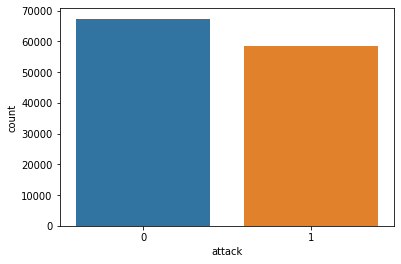

In [28]:
#Bar graph of attack variable in train ddata where 0 signifies normal and 1 signifies attack
sns.countplot(train_B['attack'])

# Data Preprocessing

In [30]:
train_B.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1,21


In [31]:
#Creating dummy for the categorical variables for train data 

dummy_protocol_type=pd.get_dummies(train_B['protocol_type'],prefix='protocol',drop_first=True)
dummy_service=pd.get_dummies(train_B['service'],prefix='service',drop_first=True)
dummy_flag=pd.get_dummies(train_B['flag'],prefix='flag',drop_first=True)

In [32]:
#Concatinating dummy variable with actual train data

train_B=pd.concat([train_B,dummy_protocol_type,dummy_service,dummy_flag],axis=1)

In [33]:
# Dropping original categorical variable because now we have their dummies

train_B=train_B.drop(['protocol_type','service','flag'],axis=1)

In [34]:
# View of our train data with dummy variable

train_B.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [35]:
test_B.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0,21


In [37]:
#Creating dummy varian=bles for categorical variables of test data so that they can contribute to the model

dummy_protocol_type=pd.get_dummies(test_B['protocol_type'],prefix='protocol',drop_first=True)
dummy_service=pd.get_dummies(test_B['service'],prefix='service',drop_first=True)
dummy_flag=pd.get_dummies(test_B['flag'],prefix='flag',drop_first=True)

In [38]:
#Concatinating the dummy variables with the original test data frame

test_B=pd.concat([test_B,dummy_protocol_type,dummy_service,dummy_flag],axis=1)

In [40]:
#Dropping the original categorical variable of test data because now we have their dummies

test_B=test_B.drop(['protocol_type','service','flag'],axis=1)

In [41]:
#View of our test data with dummy variables

test_B.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,267,14515,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
#These are the variables which are present in train data but not in test data

unique=set(train_B.columns.tolist())-set(test_B.columns.tolist())
unique


{'service_aol',
 'service_harvest',
 'service_http_2784',
 'service_http_8001',
 'service_red_i',
 'service_urh_i'}

In [43]:
# Removing these extra columns from train data

train_B=train_B.drop(['service_aol','service_harvest','service_http_2784','service_http_8001','service_red_i',
                        'service_urh_i'],axis=1)

In [44]:
#view of our train data with dropped uncomman variables

train_B.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Train - Test split of both training and test data

In [45]:
#Train test split for model building

X_train=train_B[train_B.columns.difference(['attack'])]
y_train=train_B['attack']

In [46]:
X_train.head()


,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service_vmnet,service_whois,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,13,0.15,0,255,0.60,0.0,0.88,0.00,0.00,1,...,0,0,146,1,0.00,0.0,0.0,0,0,0
1,123,0.07,0,255,0.05,0.0,0.00,0.10,1.00,26,...,0,0,0,6,0.00,0.0,1.0,0,0,0
2,5,0.00,8153,30,0.00,0.0,0.03,1.00,0.03,255,...,0,0,232,5,0.00,0.0,0.2,0,0,0
3,30,0.00,420,255,0.00,0.0,0.00,1.00,0.00,255,...,0,0,199,32,0.09,0.0,0.0,0,0,0
4,121,0.06,0,255,0.07,1.0,0.00,0.07,0.00,19,...,0,0,0,19,0.00,1.0,0.0,0,0,0


In [47]:
y_train.head()


0    0
1    1
2    0
3    0
4    1
Name: attack, dtype: int64

In [48]:
# Test Split

X_test=test_B[test_B.columns.difference(['attack'])]
y_test=test_B['attack']

In [49]:
X_test.head()


,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service_vmnet,service_whois,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,136,0.06,0,255,0.06,1.00,0.00,0.00,0.00,1,...,0,0,0,1,0.00,1.0,0.00,0,0,0
1,1,0.00,0,134,0.04,0.00,0.61,0.61,0.00,86,...,0,0,12983,1,0.00,0.0,0.00,0,0,0
2,1,0.00,0,3,0.00,0.00,1.00,1.00,0.00,57,...,0,0,20,65,1.00,0.0,0.00,0,0,0
3,1,0.00,15,29,0.17,0.83,0.03,0.31,0.00,86,...,0,0,0,8,0.75,0.5,0.12,0,0,0
4,4,0.00,14515,155,0.00,0.00,0.01,1.00,0.01,255,...,0,0,267,4,0.00,0.0,0.00,0,0,0


In [50]:
y_test.head()

0    1
1    0
2    1
3    1
4    0
Name: attack, dtype: int64

In [51]:
from sklearn.preprocessing import StandardScaler


In [52]:
#Scaling our train data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forrest Model and Features Selection

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [54]:
#Making object of the model and setting its parameter

rfc=RandomForestClassifier(n_estimators=100, max_depth=2,random_state=1355,n_jobs=-1)

In [55]:
#fitting the model to train data

rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1355, verbose=0,
                       warm_start=False)

In [56]:
#Model is predicting dependent variable values for test data
y_pred=rfc.predict(X_test_scaled)

In [57]:
#this is test data accuracy

rfc.score(X_test_scaled,y_test)

0.737523843321652

In [58]:
#this is train data accuracy

train_score=rfc.score(X_train_scaled,y_train)
train_score

0.9407884291747373

In [59]:
radm_test_pred_df = pd.DataFrame( { 'actual':  y_test,
                            'predicted': y_pred } )

In [60]:
radm_test_pred_df.head()


,actual,predicted
0,1,1
1,0,0
2,1,1
3,1,0
4,0,0


In [61]:
#test accuracy which we already calculated by score method

test_score=metrics.accuracy_score(radm_test_pred_df.actual, radm_test_pred_df.predicted)
test_score

0.737523843321652

In [62]:
#creating a data frame which will include train and test accuracy of all future model so that we can decide the best model

report=pd.DataFrame({'Model':['Random Forrest Pre'],'Train Score':train_score,'Test Score':test_score})

In [63]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.940788,0.737524


In [69]:
#creating the confusion matrix

tree_cm = metrics.confusion_matrix(radm_test_pred_df.actual, radm_test_pred_df.predicted,[1,0] )
tree_cm

array([[6944, 5699],
       [ 218, 9682]], dtype=int64)

Text(0.5, 15.0, 'True label')

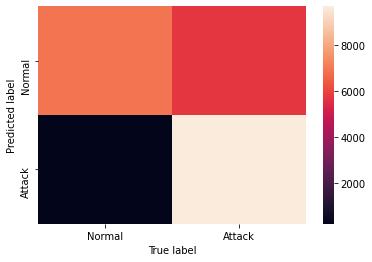

In [70]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

In [71]:
from sklearn.metrics import classification_report


In [72]:
#This is the classification report of the model performance

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77      9900
           1       0.97      0.55      0.70     12643

    accuracy                           0.74     22543
   macro avg       0.80      0.76      0.73     22543
weighted avg       0.82      0.74      0.73     22543



# Feature Selection

In [73]:
#Calculating the feature importances to choose best variables and dimentionality reduction

scores = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':scores})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

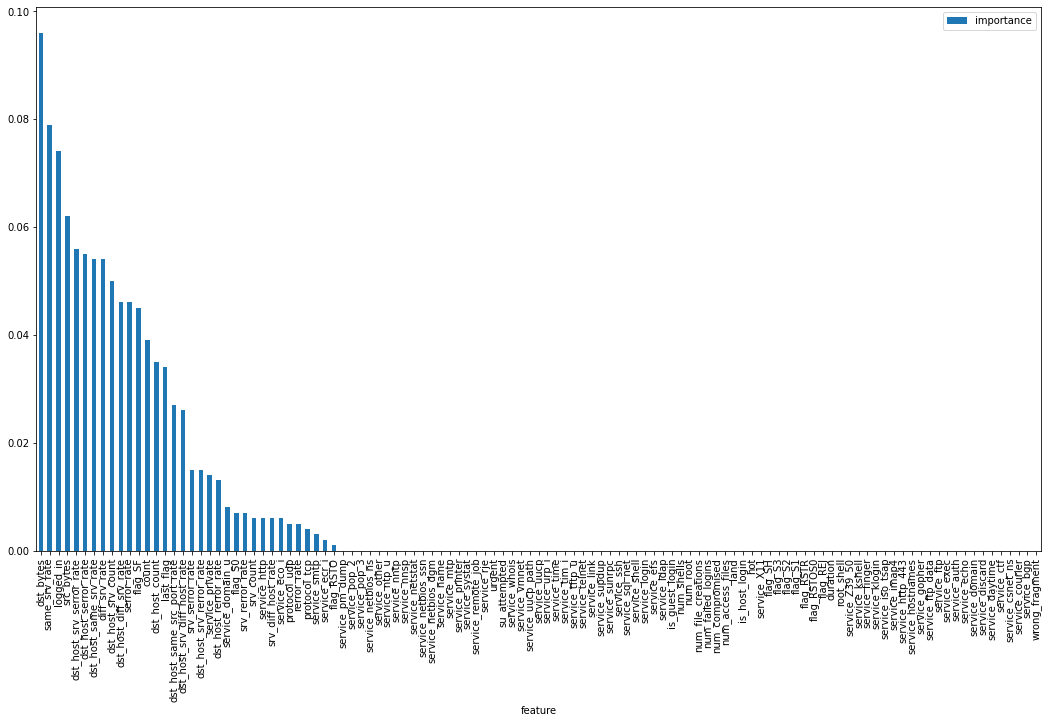

In [74]:
#this is the ranked order of the best variables in descending order

plt.rcParams['figure.figsize'] = (18, 10)
importances.plot.bar();

In [75]:
from sklearn.feature_selection import RFE


In [76]:
#Rfe can iteratively build model on an algorithm over train data and can come out with the best varibles

rfe=RFE(rfc,n_features_to_select=10)
rfe.fit(X_train_scaled,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=2, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=-1,
                                     oob_score=False, random_state=1355,
                                     verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

In [77]:
#Rfe gave us top 10 best variables as we demanded 

feature_map = [(i, v) for i, v in zip(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'flag_SF',
 'last_flag',
 'logged_in',
 'same_srv_rate',
 'src_bytes']

In [78]:
X_train_new=X_train[['count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'flag_SF',
 'last_flag',
 'logged_in',
 'same_srv_rate',
 'src_bytes']]

In [79]:
X_test_new=X_test[['count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'flag_SF',
 'last_flag',
 'logged_in',
 'same_srv_rate',
 'src_bytes']]

In [80]:
X_train_new_scaled=scaler.fit_transform(X_train_new)
X_test_new_scaled=scaler.transform(X_test_new)

# Building Final Random Forrest Model with Selected Features

In [81]:
#Rebuilding the random forrest model on the reduced dimention dataset

rfc.fit(X_train_new_scaled,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1355, verbose=0,
                       warm_start=False)

In [82]:
#predicting dependent variable for the test data

y_pred=rfc.predict(X_test_new_scaled)

In [83]:
#Even after dimentionality reduction and choosing only 10 most important variables, we are getting more or like same accuracy
#So these 10 variables are sufficeint for model building

rfc.score(X_test_new_scaled,y_test)

0.7798873264427982

In [84]:
#Train accuracy which is also more or like same

train_score=rfc.score(X_train_new_scaled,y_train)
train_score

0.9453291207569936

In [85]:
radm_test_pred_df = pd.DataFrame( { 'actual':  y_test,
                            'predicted': y_pred } )

In [86]:
radm_test_pred_df.head()


,actual,predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0


In [87]:
test_score=metrics.accuracy_score(radm_test_pred_df.actual, radm_test_pred_df.predicted)
test_score

0.7798873264427982

In [88]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.940788,0.737524


In [89]:
#Function to update report dataframe with current model and its test and train accuracy
def update_report(report,name,train,test):
    report=report.append({'Model':name,'Train Score':train,'Test Score':test},ignore_index=True)
    return report

In [90]:
report=update_report(report,'Random Forrest Final',train_score,test_score)
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.940788,0.737524
1,Random Forrest Final,0.945329,0.779887


In [91]:
#confusion matrix

tree_cm = metrics.confusion_matrix(radm_test_pred_df.actual, radm_test_pred_df.predicted,[1,0] )
tree_cm

array([[7966, 4677],
       [ 285, 9615]], dtype=int64)

Text(0.5, 69.0, 'True label')

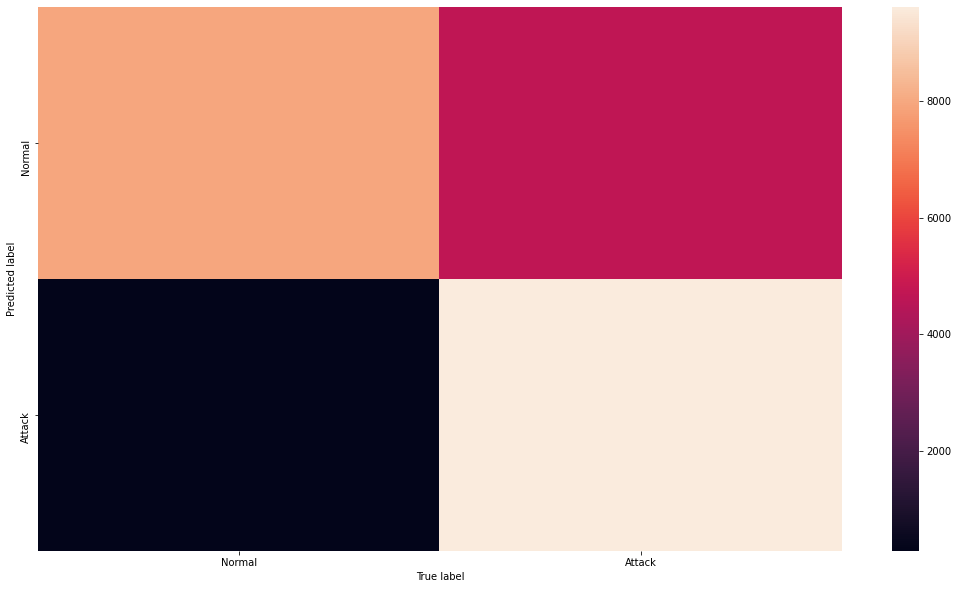

In [92]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

# KNN Model

In [13]:
from sklearn.neighbors import KNeighborsClassifier


In [94]:
knc=KNeighborsClassifier(20)


In [95]:
knc.fit(X_train_new_scaled,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [96]:
y_pred=knc.predict(X_test_new_scaled)


In [97]:
#test accuracy

knc.score(X_test_new_scaled,y_test)

0.8763252450871667

In [98]:
#train accuracy

train_score=knc.score(X_train_new_scaled,y_train)
train_score

0.9909106785634904

In [99]:
knn_test_pred_df = pd.DataFrame( { 'actual':  y_test,
                            'predicted': y_pred } )

In [100]:
knn_test_pred_df.head()


,actual,predicted
0,1,1
1,0,0
2,1,1
3,1,0
4,0,0


In [101]:
test_score=metrics.accuracy_score(knn_test_pred_df.actual, knn_test_pred_df.predicted)
test_score

0.8763252450871667

In [102]:
report=update_report(report,'KNN',train_score,test_score)


In [103]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.940788,0.737524
1,Random Forrest Final,0.945329,0.779887
2,KNN,0.990911,0.876325


In [104]:
tree_cm = metrics.confusion_matrix(knn_test_pred_df.actual, knn_test_pred_df.predicted,[1,0] )
tree_cm

array([[10479,  2164],
       [  624,  9276]], dtype=int64)

Text(0.5, 69.0, 'True label')

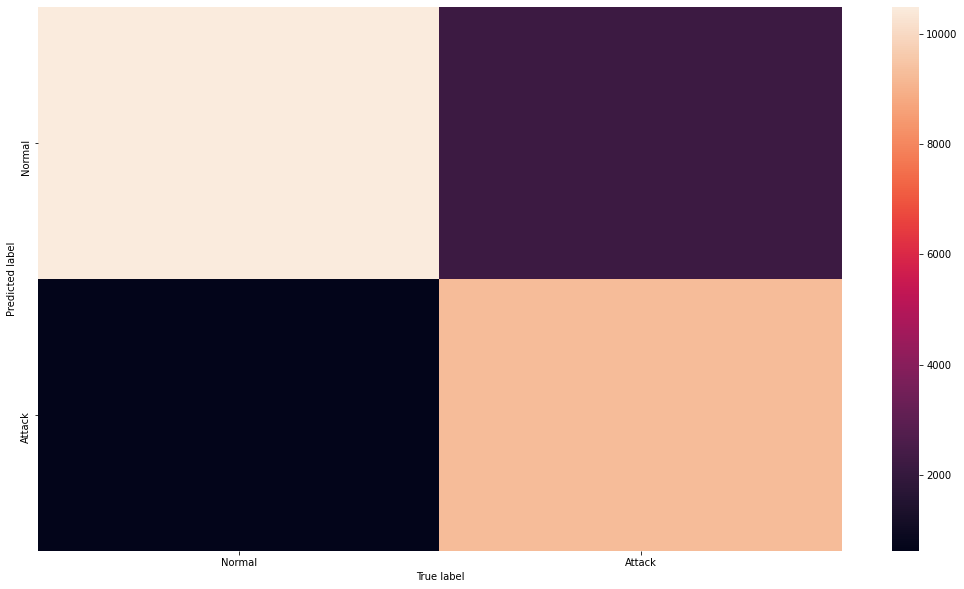

In [105]:
    sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

# Naive Bayes Model

In [107]:
from sklearn.naive_bayes import GaussianNB


In [108]:
nb = GaussianNB()


In [109]:
nb.fit(X_train_new_scaled,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [110]:
y_pred=nb.predict(X_test_new_scaled)


In [111]:
nb.score(X_test_new_scaled,y_test)


0.7510535421195049

In [112]:
train_score=nb.score(X_train_new_scaled,y_train)
train_score

0.9131314895373575

In [113]:
nb_test_pred_df = pd.DataFrame( { 'actual':  y_test,
                            'predicted': y_pred } )

In [114]:
nb_test_pred_df.head()


,actual,predicted
0,1,1
1,0,0
2,1,0
3,1,1
4,0,0


In [115]:
test_score=metrics.accuracy_score(nb_test_pred_df.actual,nb_test_pred_df.predicted)
test_score

0.7510535421195049

In [116]:
report=update_report(report,'Naive Bayes',train_score,test_score)
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.940788,0.737524
1,Random Forrest Final,0.945329,0.779887
2,KNN,0.990911,0.876325
3,Naive Bayes,0.913131,0.751054


In [117]:
tree_cm = metrics.confusion_matrix(nb_test_pred_df.actual, nb_test_pred_df.predicted,[1,0] )
tree_cm

array([[7913, 4730],
       [ 882, 9018]], dtype=int64)

Text(0.5, 69.0, 'True label')

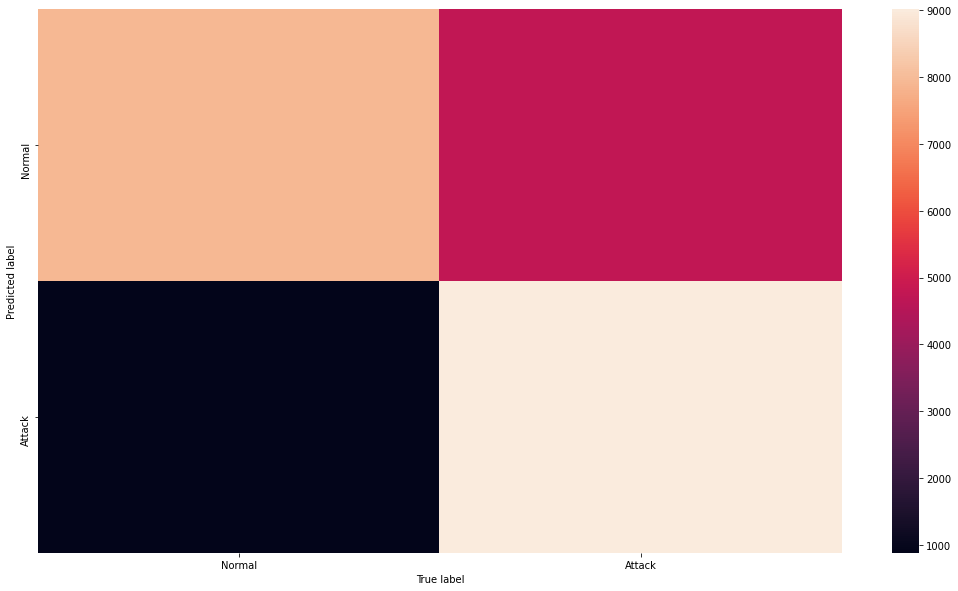

In [118]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

# Logistic Regression Model

In [1]:
from sklearn.linear_model import LogisticRegression


In [120]:
lr=LogisticRegression(n_jobs=-1)


In [121]:
lr.fit(X_train_new_scaled,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
y_pred=lr.predict(X_test_new_scaled)


In [123]:
lr.score(X_test_new_scaled,y_test)


0.8276626890830857

In [124]:
train_score=lr.score(X_train_new_scaled,y_train)
train_score

0.960229257295272

In [126]:
lr_test_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})
lr_test_pred_df.head()


,actual,predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0


In [127]:
test_score=metrics.accuracy_score(lr_test_pred_df.actual,lr_test_pred_df.predicted)
test_score

0.8276626890830857

In [128]:
report=update_report(report,'LogisticRegression',train_score,test_score)
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.940788,0.737524
1,Random Forrest Final,0.945329,0.779887
2,KNN,0.990911,0.876325
3,Naive Bayes,0.913131,0.751054
4,LogisticRegression,0.960229,0.827663


# Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier


In [130]:
dt=DecisionTreeClassifier(max_depth=3)


In [131]:
dt.fit(X_train_new_scaled,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [132]:
y_pred=dt.predict(X_test_new_scaled)


In [133]:
dt.score(X_test_new_scaled,y_test)


0.7983409484097059

In [134]:
train_score=dt.score(X_train_new_scaled,y_train)
train_score

0.9686200107960499

In [135]:
dt_test_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})


In [136]:
dt_test_pred_df.head()


,actual,predicted
0,1,1
1,0,0
2,1,1
3,1,0
4,0,0


In [137]:
test_score=metrics.accuracy_score(dt_test_pred_df.actual,dt_test_pred_df.predicted)
test_score

0.7983409484097059

In [138]:
report=update_report(report,'Decision Tree',train_score,test_score)


# Final Report And Analysis of Models

In [139]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.940788,0.737524
1,Random Forrest Final,0.945329,0.779887
2,KNN,0.990911,0.876325
3,Naive Bayes,0.913131,0.751054
4,LogisticRegression,0.960229,0.827663
5,Decision Tree,0.968620,0.798341
